[View in Colaboratory](https://colab.research.google.com/github/skhimsara/CNN/blob/master/Image_Classification_Pretrained_Models.ipynb)

In [1]:
import keras
import numpy as np
from keras.applications import vgg16, inception_v3, resnet50, mobilenet
 
#Load the VGG model
vgg_model = vgg16.VGG16(weights='imagenet')
 
#Load the Inception_V3 model
inception_model = inception_v3.InceptionV3(weights='imagenet')
 
#Load the ResNet50 model
resnet_model = resnet50.ResNet50(weights='imagenet')
 
#Load the MobileNet model
mobilenet_model = mobilenet.MobileNet(weights='imagenet')

Using TensorFlow backend.


17227776/17225924 [==============================] - 1s 0us/step


In [4]:
##upload the image you want to classify. it will be in ./content

from google.colab import files
uploaded = files.upload()


Saving speaker.jpg to speaker.jpg


In [5]:
pwd

'/content'

In [0]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.imagenet_utils import decode_predictions
import matplotlib.pyplot as plt
%matplotlib inline

PIL image size (224, 224)


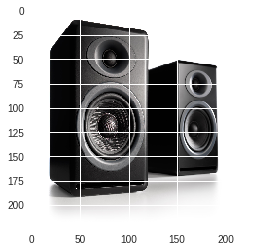

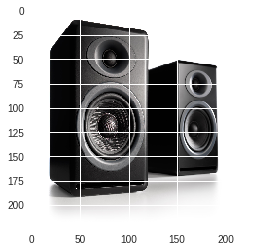

numpy array size (224, 224, 3)
image batch size (1, 224, 224, 3)


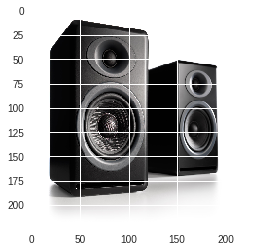

In [6]:
filename = './content/speaker.jpg'
# load an image in PIL format
original = load_img(filename, target_size=(224, 224))
print('PIL image size',original.size)
plt.imshow(original)
plt.show()
 
# convert the PIL image to a numpy array
# IN PIL - image is in (width, height, channel)
# In Numpy - image is in (height, width, channel)
numpy_image = img_to_array(original)
plt.imshow(np.uint8(numpy_image))
plt.show()
print('numpy array size',numpy_image.shape)
 
# Convert the image / images into batch format
# expand_dims will add an extra dimension to the data at a particular axis
# We want the input matrix to the network to be of the form (batchsize, height, width, channels)
# Thus we add the extra dimension to the axis 0.
image_batch = np.expand_dims(numpy_image, axis=0)
print('image batch size', image_batch.shape)
plt.imshow(np.uint8(image_batch[0]))

In [13]:
# prepare the image for the VGG model
processed_image = vgg16.preprocess_input(image_batch.copy())
 
# get the predicted probabilities for each class
predictions = vgg_model.predict(processed_image)
# print predictions
 
# convert the probabilities to class labels
# We will get top 5 predictions which is the default
label = decode_predictions(predictions)
label

[[('n03691459', 'loudspeaker', 0.9722363),
  ('n04041544', 'radio', 0.009386794),
  ('n03529860', 'home_theater', 0.0074015264),
  ('n04069434', 'reflex_camera', 0.0060429205),
  ('n02979186', 'cassette_player', 0.0041408082)]]

In [12]:
# prepare the image for the inception_v3 model
processed_image = inception_v3.preprocess_input(image_batch.copy())
 
# get the predicted probabilities for each class
predictions = inception_model.predict(processed_image)
# print predictions
 
# convert the probabilities to class labels
# We will get top 5 predictions which is the default
label = decode_predictions(predictions)
label

[[('n03691459', 'loudspeaker', 0.9766011),
  ('n04069434', 'reflex_camera', 0.018483017),
  ('n04041544', 'radio', 0.0021661895),
  ('n03529860', 'home_theater', 0.0011525616),
  ('n02988304', 'CD_player', 0.0006313476)]]

In [14]:

# prepare the image for the resnet50 model
processed_image = resnet50.preprocess_input(image_batch.copy())
 
# get the predicted probabilities for each class
predictions = resnet_model.predict(processed_image)
# print predictions
 
# convert the probabilities to class labels
# We will get top 5 predictions which is the default
label = decode_predictions(predictions)
label


[[('n03691459', 'loudspeaker', 0.93856704),
  ('n04069434', 'reflex_camera', 0.03438991),
  ('n04041544', 'radio', 0.012312042),
  ('n03529860', 'home_theater', 0.005467282),
  ('n04404412', 'television', 0.0025589492)]]

In [15]:

# prepare the image for the mobilenet model
processed_image = mobilenet.preprocess_input(image_batch.copy())
 
# get the predicted probabilities for each class
predictions = mobilenet_model.predict(processed_image)
# print predictions
 
# convert the probabilities to class labels
# We will get top 5 predictions which is the default
label = decode_predictions(predictions)
label

[[('n03691459', 'loudspeaker', 0.9932799),
  ('n04069434', 'reflex_camera', 0.005014058),
  ('n04041544', 'radio', 0.0008694226),
  ('n03584254', 'iPod', 0.00022608915),
  ('n03529860', 'home_theater', 0.00015880483)]]

Reference : https://www.learnopencv.com/image-classification-using-convolutional-neural-networks-in-keras/
